Saved plot to attention_heads_highres_dark.png


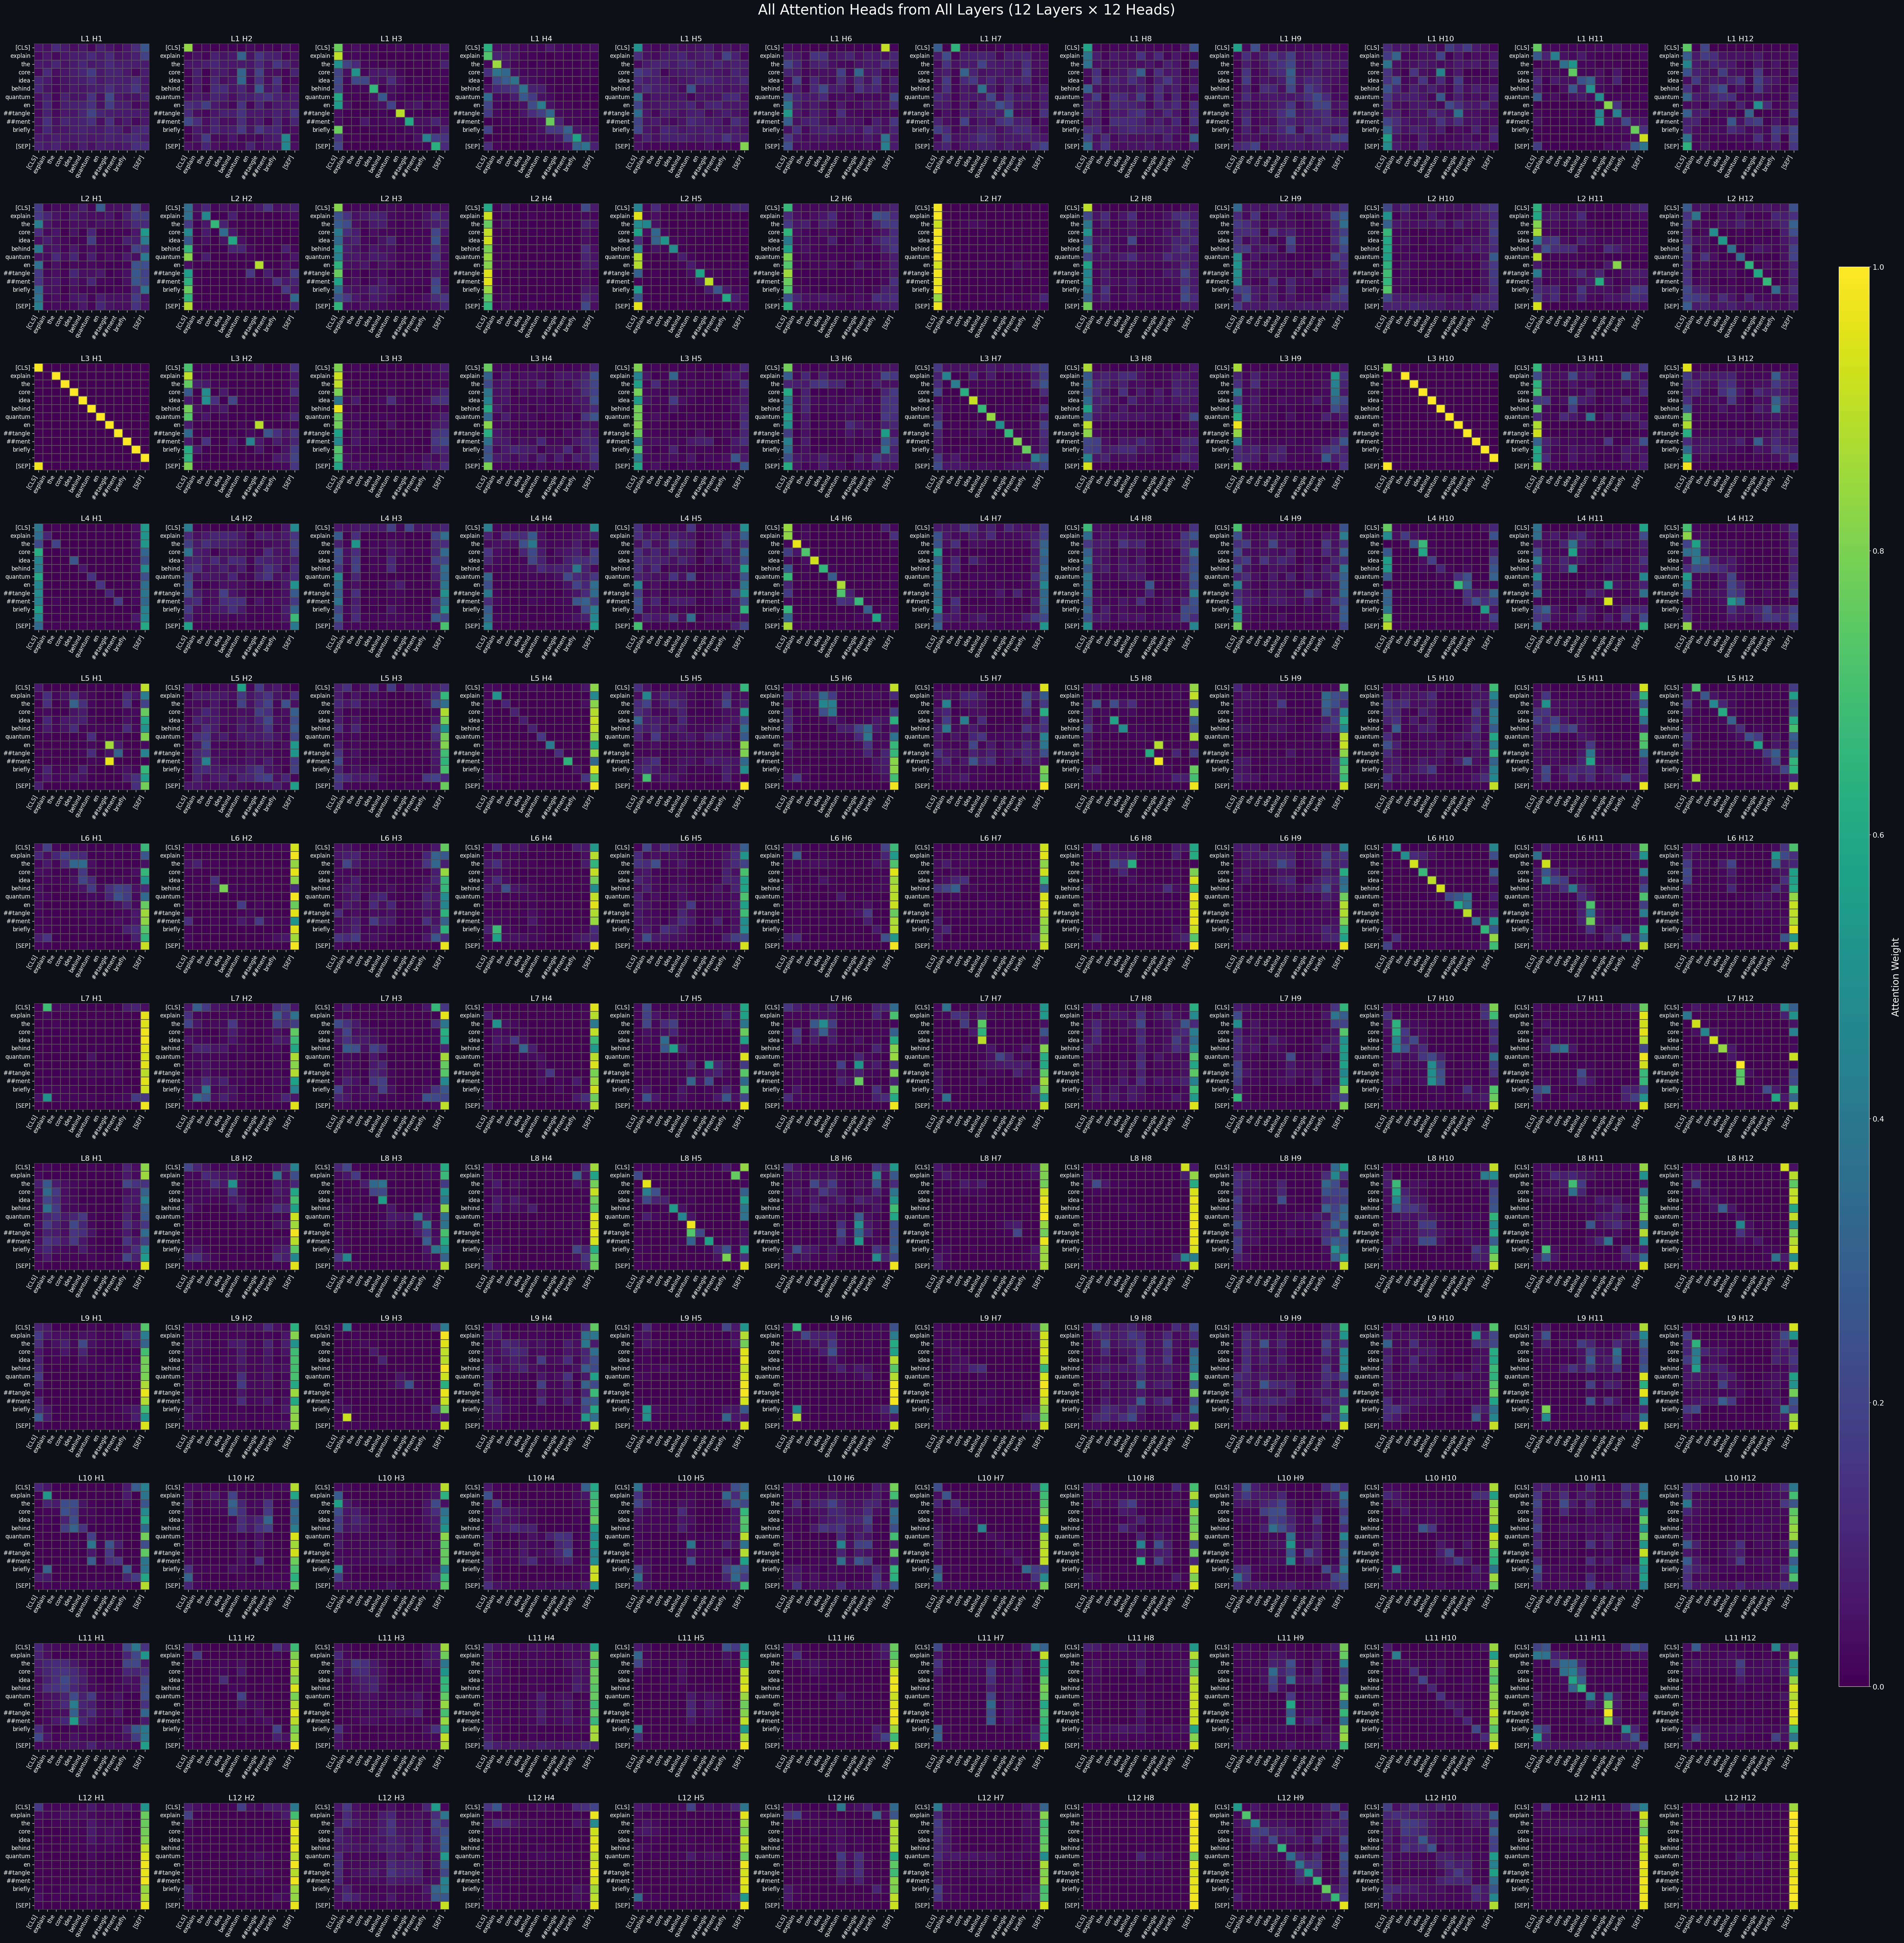

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
from matplotlib.cm import ScalarMappable
import numpy as np
import matplotlib as mpl # Import base matplotlib

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Define a sample query
query = "Explain the core idea behind quantum entanglement briefly."
inputs = tokenizer(query, return_tensors='pt')

# Process the query through the model
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention tensors (one per layer)

# Get token labels for visualization
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Define GitHub dark mode colors
github_dark_bg = '#0d1117'
text_color = 'white'
# A slightly less bright white for less prominent lines if needed
line_color = 'white' # Or try '#cccccc' for slightly dimmer lines

def visualize_all_attention_heads_highres_dark(tokens, attentions):
    """
    Visualizes all attention heads with a GitHub dark theme style.
    """
    # Create a 12x12 grid with the dark background
    fig, axes = plt.subplots(12, 12, figsize=(60, 60), facecolor=github_dark_bg)
    fig.suptitle('All Attention Heads from All Layers (12 Layers × 12 Heads)',
                 fontsize=30, # Increased title size
                 color=text_color,
                 y=0.98) # Adjust title position slightly

    # Determine global min/max attention weights for consistent color mapping (optional)
    # Can sometimes make comparison easier, but default (per-plot normalization) is fine too.
    # all_attn_values = [a.numpy() for layer in attentions for a in layer[0]]
    # global_min = min(a.min() for a in all_attn_values)
    # global_max = max(a.max() for a in all_attn_values)
    # norm = plt.Normalize(global_min, global_max)
    norm = plt.Normalize(0, 1) # Standard normalization for attention probabilities

    # Plot heatmaps for each layer and head
    for layer_idx, attention_layer in enumerate(attentions):
        for head_idx in range(12):
            ax = axes[layer_idx, head_idx]
            attn = attention_layer[0, head_idx].numpy()

            # Plot heatmap
            sns.heatmap(
                attn,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap='viridis', # Viridis looks good on dark backgrounds too
                ax=ax,
                cbar=False,  # No individual colorbars
                annot=False, # Annotations would be too cluttered
                norm=norm,   # Apply consistent normalization
                linewidths=0.3, # Add subtle lines between cells
                linecolor='#555555' # Use a dark gray for cell lines to be less intrusive
            )

            # --- Style the subplot ---
            ax.set_facecolor(github_dark_bg) # Set subplot background

            # Set title style (larger font)
            ax.set_title(f'L{layer_idx+1} H{head_idx+1}', fontsize=16, color=text_color)

            # Set tick label style (larger font)
            ax.set_xticks(np.arange(len(tokens)) + 0.5) # Center ticks
            ax.set_yticks(np.arange(len(tokens)) + 0.5) # Center ticks
            ax.set_xticklabels(tokens, rotation=60, ha='right', fontsize=12, color=text_color)
            ax.set_yticklabels(tokens, rotation=0, fontsize=12, color=text_color)

            # Set tick parameters (marks and grid lines off by default in heatmap, but style ticks)
            ax.tick_params(axis='x', colors=text_color, length=4, width=1)
            ax.tick_params(axis='y', colors=text_color, length=4, width=1)

            # Set axes lines (spines) color
            for spine in ax.spines.values():
                spine.set_edgecolor(line_color) # Use the defined line_color

    # --- Add and style the single colorbar ---
    sm = ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])

    # Position the colorbar axes (adjust position and size as needed)
    # [left, bottom, width, height] relative to figure size
    cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])

    # Create the colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax)

    # Style the colorbar
    cbar.set_label('Attention Weight', color=text_color, fontsize=20, labelpad=15)
    cbar.ax.tick_params(colors=text_color, labelsize=16)
    cbar.outline.set_edgecolor(text_color) # Style the cbar border/outline

    # Adjust layout to prevent overlap - manual adjustment often needed
    # plt.tight_layout(rect=[0, 0.03, 0.92, 0.96]) # rect might clip with manual cbar
    plt.subplots_adjust(left=0.04, right=0.91, top=0.96, bottom=0.04, wspace=0.3, hspace=0.5)


    # Save at high resolution with the specified background color
    plt.savefig('attention_heads_highres_dark.png',
                format='png',
                dpi=600,
                facecolor=github_dark_bg, # Ensure savefig uses the correct background
                # bbox_inches='tight' # Use cautiously with subplots_adjust, might clip titles/labels
               )
    print("Saved plot to attention_heads_highres_dark.png")
    plt.show() # Optionally display the plot interactively
    plt.close(fig) # Close the figure to free memory

# Generate the high-resolution grid visualization with the dark theme
visualize_all_attention_heads_highres_dark(tokens, attentions)

<ipython-input-2-3a096c2eec4a>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


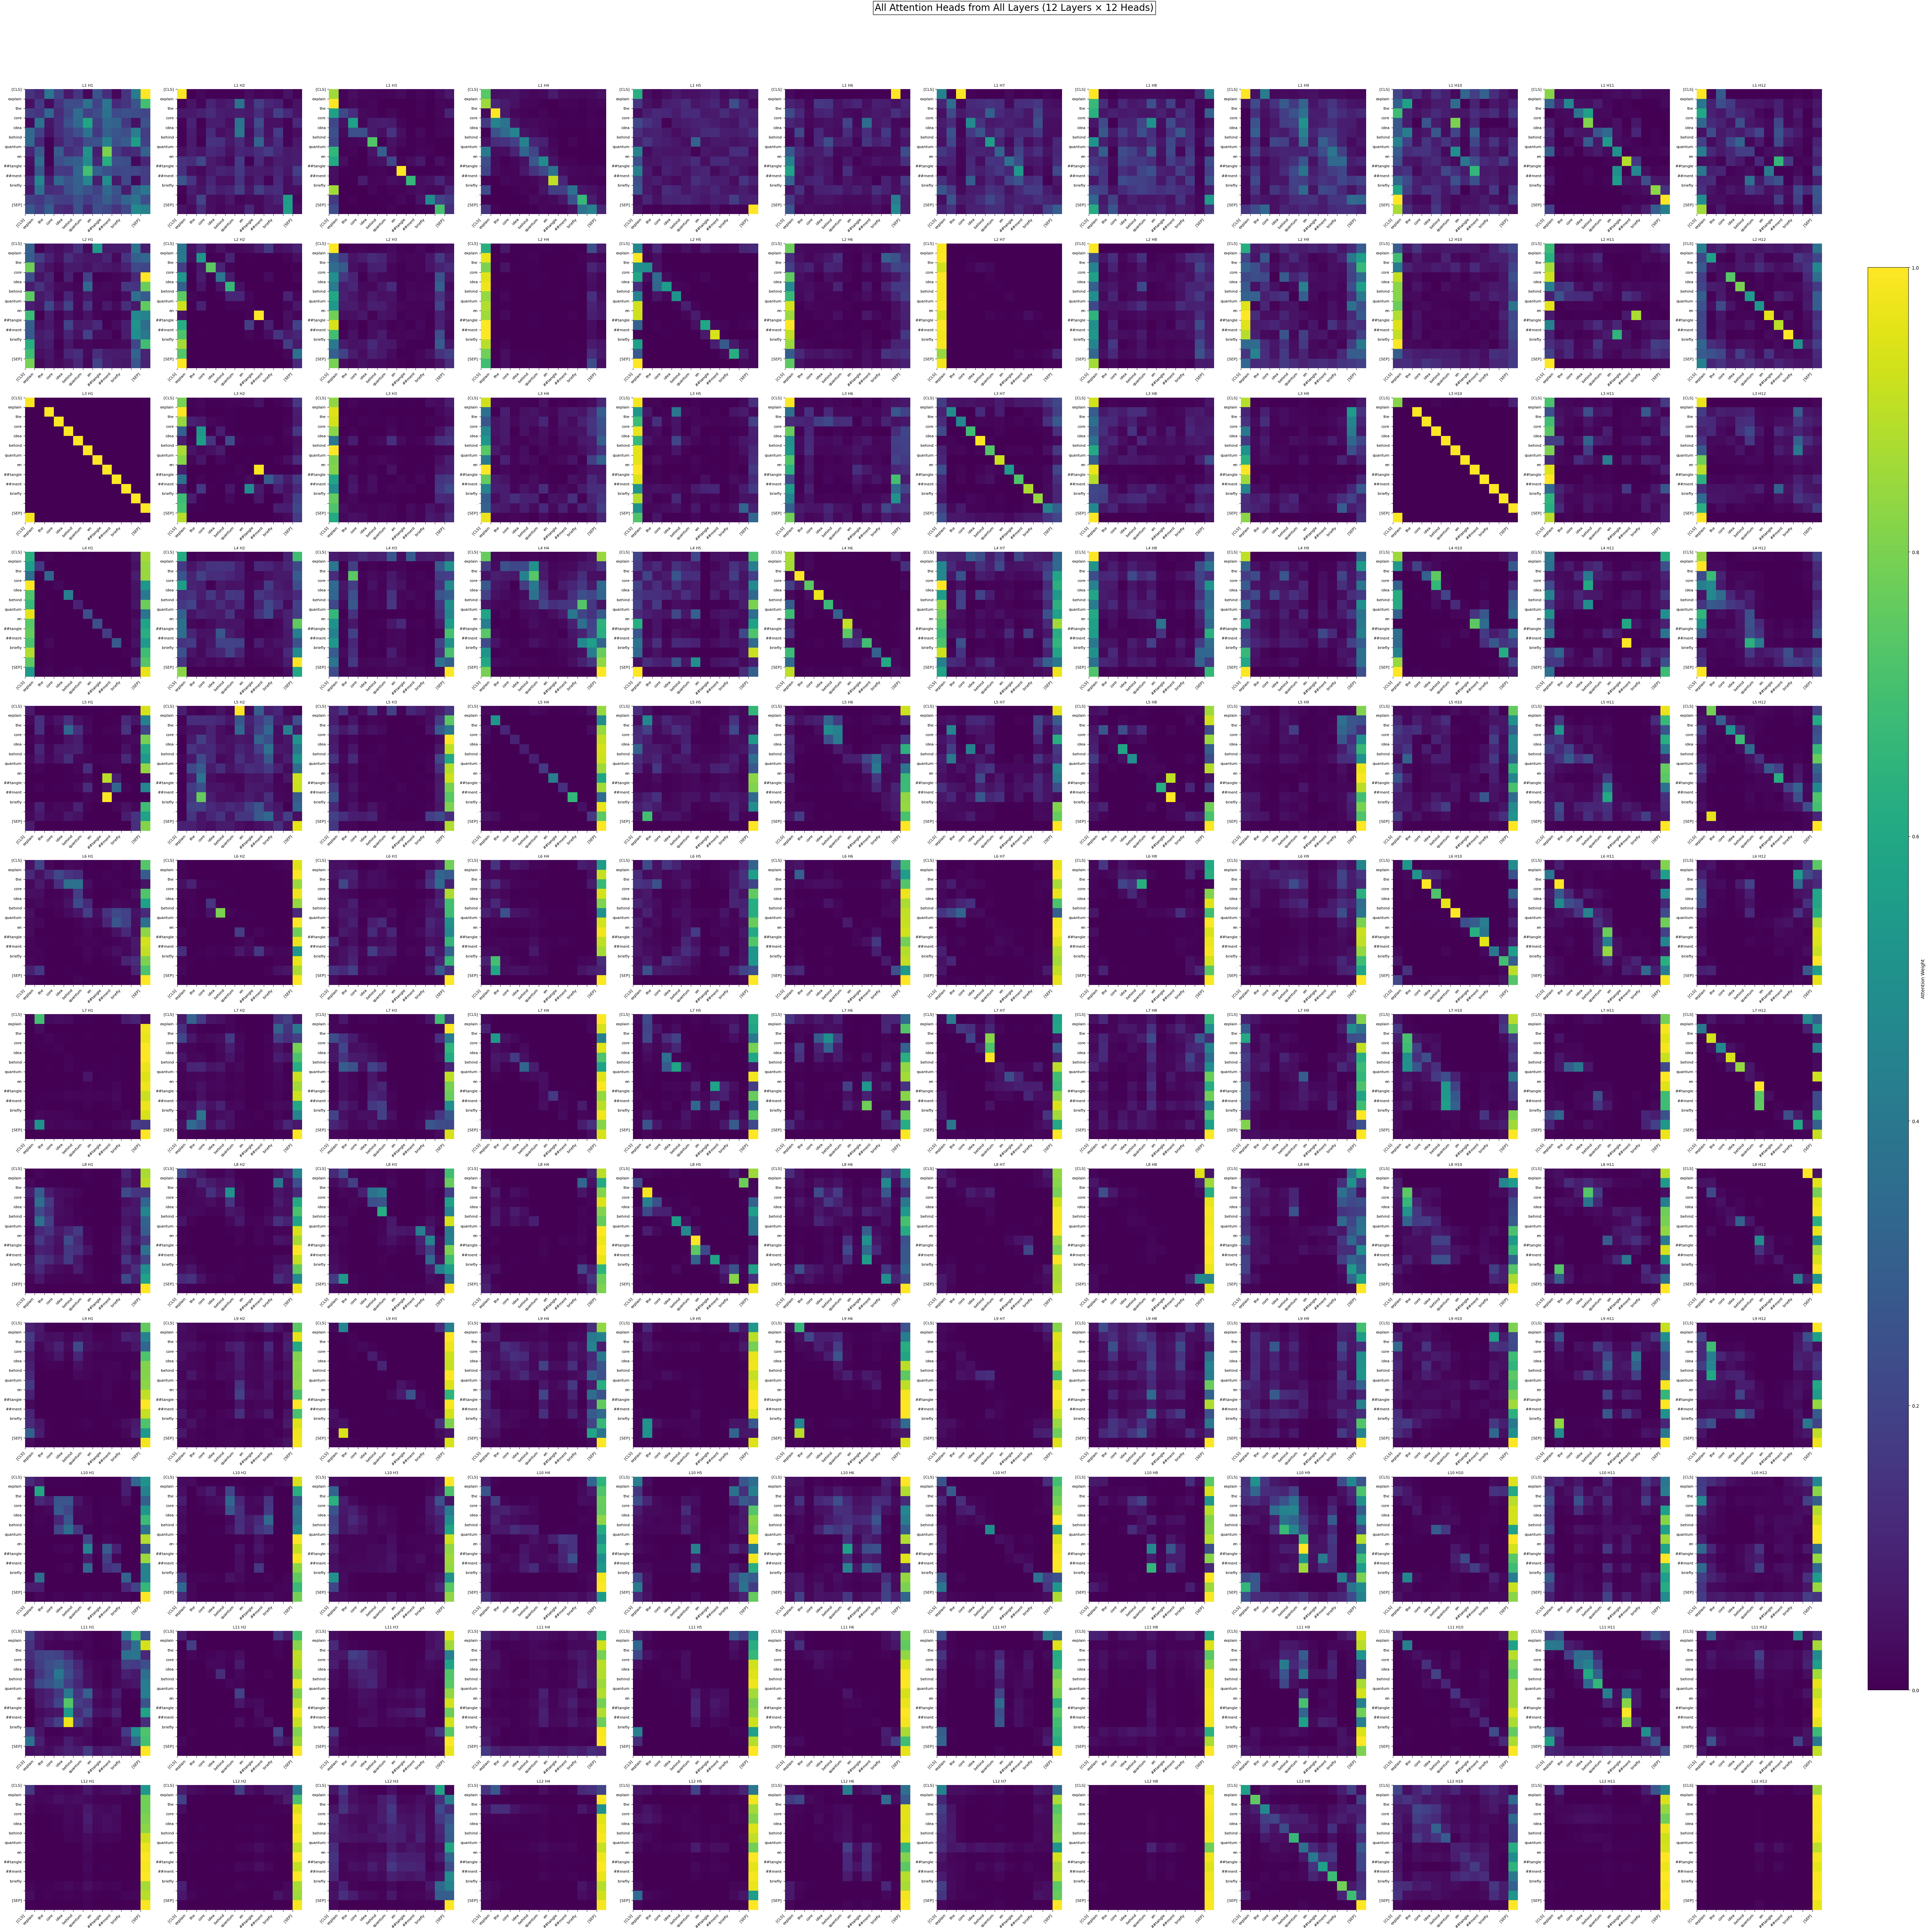

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
from matplotlib.cm import ScalarMappable
import numpy as np

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Define a sample query
query = "Explain the core idea behind quantum entanglement briefly."
inputs = tokenizer(query, return_tensors='pt')

# Process the query through the model
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention tensors (one per layer)

# Get token labels for visualization
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

def visualize_all_attention_heads_highres(tokens, attentions):
    # Create a 12x12 grid with a large figure size
    fig, axes = plt.subplots(12, 12, figsize=(60, 60), facecolor='none')
    fig.suptitle('All Attention Heads from All Layers (12 Layers × 12 Heads)',
                 fontsize=20, bbox=dict(facecolor='none'))

    # Plot heatmaps for each layer and head
    for layer_idx, attention_layer in enumerate(attentions):
        for head_idx in range(12):
            ax = axes[layer_idx, head_idx]
            attn = attention_layer[0, head_idx].numpy()
            sns.heatmap(
                attn,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap='viridis',
                ax=ax,
                cbar=False,  # No individual colorbars
                annot=False
            )
            ax.set_title(f'L{layer_idx+1} H{head_idx+1}', fontsize=8)
            ax.set_xticks(range(len(tokens)))
            ax.set_yticks(range(len(tokens)))
            ax.set_xticklabels(tokens, rotation=45, ha='right', fontsize=8)
            ax.set_yticklabels(tokens, rotation=0, fontsize=8)
            ax.set_facecolor('none')  # Transparent background for each subplot

    # Add a single colorbar for the entire figure
    sm = ScalarMappable(cmap='viridis', norm=plt.Normalize(0, 1))
    sm.set_array([])
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Vertical colorbar on the right
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Attention Weight')

    # Adjust layout to accommodate the colorbar
    plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
    # Save at double resolution (600 DPI)
    plt.savefig('attention_heads_highres.png', format='png', dpi=600, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

# Generate the high-resolution grid visualization
visualize_all_attention_heads_highres(tokens, attentions)